## 11. 파이썬 클래스
파이썬 클래스는 `타입`을 만들어내는 도구입니다. int, float, str과 같이 여러분의 새로운 타입을 만들 수 있습니다.

### 📌 클래스는 왜 필요한가?
프로그래머들이 가장 많이 사용하는 프로그래밍 언어 중 하나인 C 언어에는 클래스가 없다. 이 말은 굳이 클래스가 없어도 프로그램을 충분히 만들 수 있다는 뜻이다. 파이썬으로 잘 만든 프로그램을 살펴봐도 클래스를 사용하지 않고 작성한 것이 매우 많다. 즉, 클래스는 지금까지 공부한 함수나 자료형처럼 프로그램 작성을 위해 꼭 필요한 요소는 아니다.

하지만 프로그램을 작성할 때 클래스를 적재적소에 사용하면 프로그래머가 얻을 수 있는 이익은 많다. 예제를 통해 한번 생각해 보자.

### 📌 계산기 프로그램을 만들며 클래스 알아보기
여러분 모두 계산기를 사용해 보았을 것이다. 계산기에 숫자 3을 입력하고 +를 입력한 후 4를 입력하면 결괏값으로 7을 보여 준다. 다시 한번 +를 입력한 후 3을 입력하면 기존 결괏값 7에 3을 더해 10을 보여 준다. 즉, 계산기는 이전에 계산한 결괏값을 항상 메모리 어딘가에 저장하고 있어야 한다.

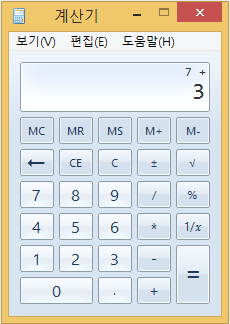

> 계산기는 이전에 계산한 결괏값을 기억하고 있어야 한다.

이런 내용을 우리가 앞에서 익힌 함수를 이용해 구현해 보자. 계산기의 ‘더하기’ 기능을 구현한 파이썬 코드는 다음과 같다.

In [2]:
# calculator.py
result = 0

def add(num):
    global result
    result += num  # 결괏값(result)에 입력값(num) 더하기
    return result  # 결괏값 리턴

print(add(3))
print(add(4))

3
7


입력값을 이전에 계산한 결괏값에 더한 후 리턴하는 add 함수를 위와 같이 작성했다. 이전에 계산한 결괏값을 유지하기 위해서 result 전역 변수(global)를 사용했다. 프로그램을 실행하면 예상한 대로 다음과 같은 결괏값이 출력된다.

```plain text
3
7
```

그런데 만일 한 프로그램에서 2대의 계산기가 필요한 상황이 발생하면 어떻게 해야 할까? 각 계산기는 각각의 결괏값을 유지해야 하므로 위와 같이 add 함수 하나만으로는 결괏값을 따로 유지할 수 없다.

이런 상황을 해결하려면 다음과 같이 함수를 각각 따로 만들어야 한다.

In [3]:
# calculator2.py
result1 = 0
result2 = 0

def add1(num):  # 계산기1
    global result1
    result1 += num
    return result1

def add2(num):  # 계산기2
    global result2
    result2 += num
    return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


똑같은 일을 하는 add1과 add2 함수를 만들고 각 함수에서 계산한 결괏값을 유지하면서 저장하는 전역 변수 result1과 result2를 정의했다.

결괏값은 다음과 같이 의도한 대로 출력된다.

```plain text
3
7
3 
10
```

계산기 1의 결괏값이 계산기 2에 아무런 영향을 끼치지 않는다는 것을 확인할 수 있다. 하지만 계산기가 3개, 5개, 10개로 점점 더 많이 필요해진다면 어떻게 해야 할까? 그때마다 전역 변수와 함수를 추가할 것인가? 여기에 계산기마다 빼기나 곱하기와 같은 기능을 추가해야 한다면 상황은 점점 더 어려워질 것이다.

아직 클래스에 대해 배우지 않았지만, 위와 같은 경우에 클래스를 사용하면 다음과 같이 간단하게 해결할 수 있다.

> 다음 예시 클래스를 아직은 이해하지 못해도 좋다. 곧 자세하게 배울 것이다. 여기에서는 클래스 개념만 어렴풋이 이해하면 된다.

In [4]:
# calculator3.py
class Calculator:
    def __init__(self):
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result

cal1 = Calculator()
cal2 = Calculator()

print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


프로그램을 실행하면 함수 2개를 사용했을 때와 동일한 결과가 출력된다.

Calculator 클래스로 만든 별개의 계산기 cal1, cal2(파이썬에서는 이것을 ‘객체’라고 부른다)가 각각의 역할을 수행한다. 그리고 계산기의 결괏값 역시 다른 계산기의 결괏값과 상관없이 독립적인 값을 유지한다. 이렇게 클래스를 사용하면 계산기 대수가 늘어나도 객체를 생성하면 되므로 함수만 사용할 때보다 간단하게 프로그램을 작성할 수 있다. 빼기 기능을 더하고 싶다면 Calculator 클래스에 다음과 같이 빼기 기능을 가진 함수를 추가하면 된다.

In [5]:
class Calculator:
    def __init__(self):
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result

    def sub(self, num):
        self.result -= num
        return self.result


클래스의 이점은 이것만이 아니다. 하지만 이 예시 하나만으로도 ‘도대체 왜 클래스가 필요한 것일까?’라는 근본적인 물음에 답이 되었을 것이다.

### 📌 클래스와 객체

클래스를 가장 잘 설명해 주는 다음 그림을 살펴보자. 과자를 만드는 과자 틀과 이를 사용해 만든 과자이다.

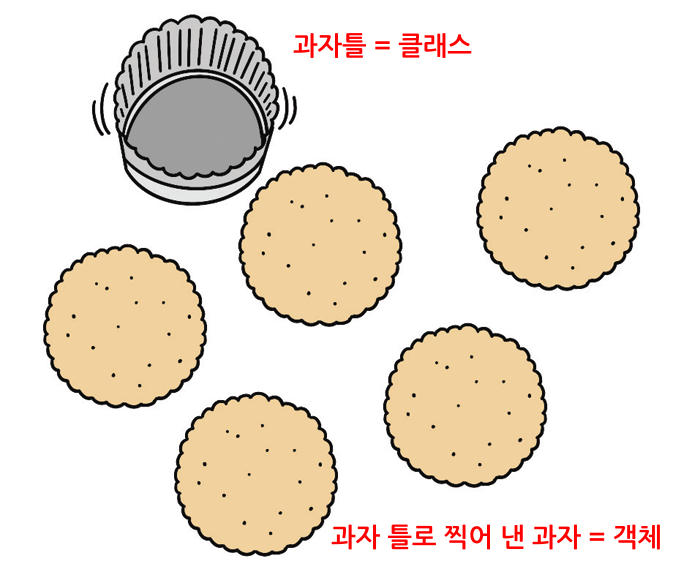
- 과자 틀 = 클래스
- 과자 틀로 찍어 낸 과자 = 객체
여기에서 설명할 클래스는 과자 틀과 비슷하다. 클래스(class)란 똑같은 무언가를 계속 만들어 낼 수 있는 설계 도면(과자 틀), 객체(object)란 클래스로 만든 피조물(과자 틀로 찍어 낸 과자)을 뜻한다.


클래스로 만든 객체에는 중요한 특징이 있다. 바로 객체마다 고유한 성격을 가진다는 것이다. 과자 틀로 만든 과자에 구멍을 뚫거나 조금 베어 먹더라도 다른 과자에는 아무런 영향이 없는 것과 마찬가지로 동일한 클래스로 만든 객체들은 서로 전혀 영향을 주지 않는다.

다음은 파이썬 클래스의 가장 간단한 예이다.

```python
class Cookie:
    pass
```

위에서 작성한 Cookie 클래스는 아무런 기능도 가지고 있지 않은 껍질뿐인 클래스이다. 하지만 이렇게 껍질뿐인 클래스도 객체를 생성하는 기능이 있다. ‘과자 틀’로 ‘과자’를 만드는 것처럼 말이다.

객체는 클래스로 만들고 1개의 클래스는 무수히 많은 객체를 만들어 낼 수 있다. 위에서 만든 Cookie 클래스의 객체를 만드는 방법은 다음과 같다.

```python
a = Cookie()
b = Cookie()
```
Cookie()의 결괏값을 리턴받은 a와 b가 바로 객체이다. 마치 함수를 사용해서 그 결괏값을 리턴받는 모습과 비슷하다.

#### 🔍 객체와 인스턴스의 차이
클래스로 만든 객체를 ‘인스턴스’라고도 한다. 그렇다면 객체와 인스턴스의 차이는 무엇일까? 이렇게 생각해 보자. a = Cookie()로 만든 a는 객체이다. 그리고 a 객체는 Cookie의 인스턴스이다. 즉, 인스턴스라는 말은 특정 객체(a)가 어떤 클래스(Cookie)의 객체인지를 관계 위주로 설명할 때 사용한다. ‘a는 인스턴스’보다 ‘a는 객체’라는 표현이 어울리며 ‘a는 Cookie의 객체’보다 ‘a는 Cookie의 인스턴스’라는 표현이 훨씬 잘 어울린다.

### 📌 사칙 연산 클래스 만들기
‘백견(百見)이 불여일타(一打)’라고 했다. 클래스를 직접 만들며 배워 보자. 여기에서는 사칙 연산을 하는 클래스를 만들어 볼 것이다. 사칙 연산은 더하기, 빼기, 곱하기, 나누기를 말한다.

#### 🔍 1. 클래스를 어떻게 만들지 먼저 구상하기
클래스는 무작정 만드는 것보다 클래스로 만든 객체를 중심으로 어떤 식으로 동작하게 할지 미리 구상한 후 생각한 것을 하나씩 만들면서 완성해 나가는 것이 좋다.
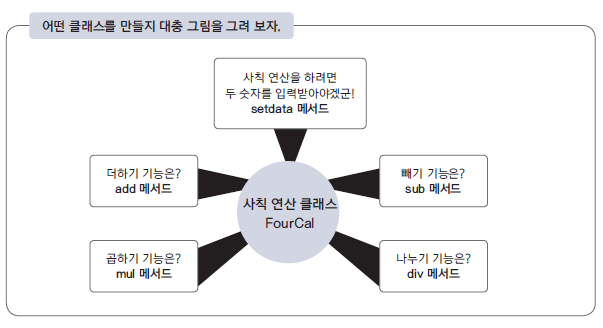

사칙 연산 기능을 가진 FourCal 클래스가 다음처럼 동작한다고 가정해 보자.

먼저 a = FourCal()를 입력해서 a라는 객체를 만든다.

```python
a = FourCal()
```

그런 다음 `a.setdata(4, 2)`처럼 입력해서 숫자 4와 2를 a에 지정해 준다.

```python
a.setdata(4, 2)
```

`a.add()`를 수행하면 두 수를 합한 결과(4 + 2)를 리턴한다.

```python
a.add()
```

`a.mul()`을 수행하면 두 수를 곱한 결과(4 * 2)를 리턴한다.

```python
a.mul()
````

`a.sub()`를 수행하면 두 수를 뺀 결과(4 - 2)를 리턴한다.

```python
a.sub()
```

`a.div()`를 수행하면 두 수를 나눈 결과(4 / 2)를 리턴한다.

```python
a.div()
```

이렇게 동작하는 FourCal 클래스를 만드는 것이 바로 우리의 목표이다.

#### 🔍 2. 클래스 구조 만들기
그러면 지금부터 앞에서 구상한 것처럼 동작하는 클래스를 만들어 보자. 제일 먼저 할 일은 a = FourCal()처럼 객체를 만들 수 있게 하는 것이다. 일단은 아무런 기능이 없어도 되기 때문에 매우 간단하게 만들 수 있다. 다음을 따라 해 보자.

In [1]:
class FourCal:
    pass

먼저 대화형 인터프리터에서 pass라는 문장만을 포함한 FourCal 클래스를 만든다. 현재 상태에서 FourCal 클래스는 아무 변수나 함수도 포함하지 않지만, 우리가 원하는 객체 a를 만들 수 있는 기능은 가지고 있다. 한번 확인해 보자.

> pass는 아무것도 수행하지 않는 문법으로, 임시로 코드를 작성할 때 주로 사용한다.

In [2]:
a = FourCal()
type(a)

__main__.FourCal

위와 같이 `a = FourCal()`로 a 객체를 먼저 만든 후 \
`type(a)`로 a 객체가 어떤 타입인지 알아보았다. \
역시 객체 a가 FourCal 클래스의 인스턴스라는 것을 알 수 있다.

> type은 파이썬이 자체로 가지고 있는 내장 함수로, 객체의 타입을 출력한다.

#### 🔍 3. 객체에 연산할 숫자 지정하기
하지만 생성된 객체 a는 아직 아무런 기능도 하지 못한다. 이제 더하기, 빼기, 곱하기, 나누기 등의 기능을 하는 객체를 만들어야 한다. 그런데 이러한 기능을 갖춘 객체를 만들려면 먼저 사칙 연산을 할 때 사용할 2개의 숫자를 a 객체에게 알려 주어야 한다. 다음과 같이 연산을 수행할 대상(4, 2)을 객체에 지정할 수 있게 만들어 보자.

```python
a.setdata(4, 2)
```
위 문장이 동작하려면 다음과 같이 FourCal 클래스를 다시 정의해야 한다.

In [8]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second

앞에서 만든 FourCal 클래스에서 pass 문장을 삭제하고 그 대신 setdata 함수를 정의했다. 클래스 안에 구현된 함수는 다른 말로 **메서드(method)** 라고 부른다. 앞으로 클래스 내부의 함수는 항상 메서드라고 표현할 테니 메서드라는 용어를 기억해 두자.

일반적인 함수를 만들 때는 다음과 같이 소스 코드를 작성한다.
```python
def 함수_이름(매개변수):
    수행할_문장
    ...
```

메서드도 클래스에 포함되어 있다는 점만 제외하면 일반 함수와 다를 것이 없다.

setdata 메서드를 다시 보면 다음과 같다.
```python
def setdata(self, first, second):   # 메서드의 매개변수
    self.first = first              # 메서드의 수행문
    self.second = second            # 메서드의 수행문
```

##### [setdata 메서드의 매개변수]
setdata 메서드를 좀 더 자세히 살펴보자. setdata 메서드는 매개변수로 self, first, second 3개의 입력값을 받는다. 그런데 일반 함수와 달리, 메서드의 첫 번째 매개변수 self는 특별한 의미를 가진다.

다음과 같이 a 객체를 만들고 a 객체를 통해 setdata 메서드를 호출해 보자.

In [10]:
a = FourCal()
a.setdata(4,2)

> 객체를 이용해 클래스의 메서드를 호출하려면 a.setdata(4, 2)와 같이 도트(.) 연산자를 사용하면 된다.

그런데 뭔가 좀 이상하지 않은가? setdata 메서드에는 self, first, second 총 3개의 매개변수가 필요한데 실제로는 `a.setdata(4, 2)`처럼 2개의 값만 전달했다. 왜 그럴까? `a.setdata(4, 2)`처럼 호출하면 setdata 메서드의 첫 번째 매개변수 self에는 setdata 메서드를 호출한 객체 a가 자동으로 전달되기 때문이다. 다음 그림을 보면 객체의 메서드를 호출할 때 입력한 값이 메서드에 어떻게 전달되는지 쉽게 이해할 수 있을 것이다.

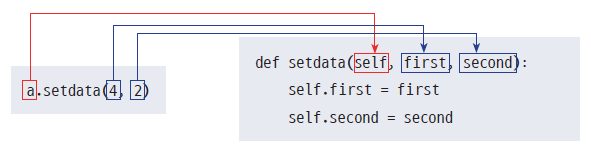

파이썬 메서드의 첫 번째 매개변수 이름은 관례적으로 self를 사용한다. 객체의 메서드를 호출할 때 호출한 객체 자신이 전달되기 때문에 self라는 이름을 사용한 것이다. 물론 self말고 다른 이름을 사용해도 상관없다.

> 메서드의 첫 번째 매개변수 self를 명시적으로 구현하는 것은 파이썬만의 독특한 특징이다. 예를 들어 자바와 같은 언어는 첫 번째 매개변수 self가 필요없다.

##### [메서드를 호출하는 또 다른 방법]
잘 사용하지는 않지만, 다음과 같이 클래스를 이용해 메서드를 호출할 수도 있다.
```python
a = FourCal()
FourCal.setdata(a, 4, 2)
```
위와 같이 ‘클래스명.메서드’ 형태로 호출할 때는 객체 a를 첫 번째 매개변수 self에 꼭 전달해야 한다. 반면 다음처럼 ‘객체.메서드’ 형태로 호출할 때는 self를 반드시 생략해서 호출해야 한다.

```python
a = FourCal()
a.setdata(4, 2)
```

##### [setdata 메서드의 수행문]
이제 setdata 메서드의 수행문에 대해 알아보자.
```python
def setdata(self, first, second):   # 메서드의 매개변수
    self.first = first              # 메서드의 수행문
    self.second = second            # 메서드의 수행문
```

`a.setdata(4, 2)`처럼 호출하면 setdata 메서드의 매개변수 first, second에는 각각 값 4와 2가 전달되어 setdata 메서드의 수행문이 다음과 같이 해석된다.

```python
self.first = 4
self.second = 2
```

self는 전달된 객체 a이므로 다시 다음과 같이 해석된다.
```python
a.first = 4
a.second = 2
```
`a.first = 4`라는 문장이 수행되면 a 객체에 객체변수 first가 생성되고 4라는 값이 저장된다. 이와 마찬가지로 `a.second = 2`라는 문장이 수행되면 a 객체에 객체변수 second가 생성되고 2라는 값이 저장된다.
> 객체에 생성되는 객체만의 변수를 ‘객체변수’ 또는 ‘속성’이라고 부른다.

다음과 같이 확인해 보자.


In [11]:
a = FourCal()
a.setdata(4,2)

In [12]:
a.first

4

In [13]:
a.second

2

a 객체에 객체변수 first와 second가 생성된 것을 확인할 수 있다.

이번에는 다음과 같이 a, b 객체를 만들어 보자.

In [14]:
a = FourCal()
b = FourCal()

그리고 a 객체의 객체변수 first를 다음과 같이 생성한다.

In [16]:
a.setdata(4,2)
a.first

4

이번에는 b 객체의 객체변수 first를 다음과 같이 생성한다.

In [17]:
b.setdata(3,7)
b.first

3

자, 이제 여러분에게 매우 중요한 질문을 1가지 하겠다. 위와 같이 진행하면 b 객체의 객체변수 first에는 값 3이 저장된다는 것을 확인할 수 있었다. 그렇다면 a 객체의 first에 저장된 값도 3으로 변할까, 아니면 원래대로 값 4를 유지할까?

정답: a객체의 객체 변수는 b객체의 객체 변수와는 상관없이 값을 유지합니다.

다음과 같이 그 결과를 확인해 보자.

In [18]:
a.first

4

a 객체의 first 값은 b 객체의 first 값에 영향받지 않고 원래 값을 유지하고 있다는 것을 확인할 수 있다. 이 예제를 통해 여러분에게 강조하고 싶은 점이 바로 이것이다. 클래스로 만든 객체의 객체변수는 다른 객체의 객체변수에 상관없이 독립적인 값을 유지한다. 클래스에서는 이 부분을 이해하는 것이 가장 중요하다.

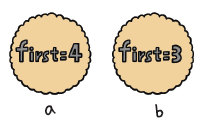

다음은 현재까지 완성된 FourCal 클래스이다.

In [19]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second

지금까지 살펴본 내용이 바로 이 4줄의 소스 코드를 설명하기 위한 것이었다. 앞에서 설명한 것들이 이해되지 않는다면 다시 한번 읽어 보기 바란다. 이 부분을 이해하지 못하면 다음으로 넘어갈 수 없기 때문이다.

#### 🔍 4. 더하기 기능 만들기

자! 2개의 숫자 값을 설정해 주었으므로 2개의 숫자를 더하는 기능을 방금 만든 클래스에 추가해 보자. 우리는 다음과 같이 더하기 기능을 갖춘 클래스를 만들어야 한다.

```python
>>> a = FourCal()
>>> a.setdata(4, 2)
>>> a.add()
6
```
이 연산이 가능하도록 FourCal 클래스를 다시 작성해 보자.

In [20]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second
    def add(self):
        result = self.first + self.second
        return result

add 메서드를 새롭게 추가했다. 이제 클래스를 사용해 보자.

In [21]:
a = FourCal()
a.setdata(4,2)

위와 같이 호출하면 앞에서 살펴보았듯이 a 객체의 first, second 객체변수에는 각각 값 4와 2가 저장될 것이다.

이제 add 메서드를 호출해 보자.

In [22]:
a.add()

6

a.add()라고 호출하면 add 메서드가 호출되어 값 6이 출력될 것이다. 어떤 과정을 거쳐 값 6이 출력되는지 add 메서드를 따로 떼어 내 자세히 살펴보자.

```python
def add(self):
    result = self.first + self.second
    return result
```

add 메서드의 매개변수는 self, 리턴값은 result이다. 리턴값인 result를 계산하는 부분은 다음과 같다.

```python
result = self.first + self.second
```

a.add()와 같이 a 객체에 의해 add 메서드가 수행되면 add 메서드의 self에는 객체 a가 자동으로 입력되므로 이 내용은 다음과 같이 해석된다.

```python
result = a.first + a.second
```

a.first와 a.second는 add 메서드가 호출되기 전에 a.setdata(4, 2) 문장에서 a.first = 4, a.second = 2로 설정된다. 따라서 위 문장은 다시 다음과 같이 해석된다.

```python
result = 4 + 2
```

따라서 다음과 같이 a.add()를 호출하면 6을 리턴한다.

```python
>>> a.add()
6
```

여기까지 모두 이해한 독자라면 클래스에 대해 80% 이상을 안 것이다. 파이썬의 클래스는 그다지 어렵지 않다.


#### 🔍 5. 곱하기, 빼기, 나누기 기능 만들기
이번에는 곱하기, 빼기, 나누기 등을 할 수 있도록 프로그램을 개선해 보자.

In [23]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second
    def add(self):
        result = self.first + self.second
        return result
    def mul(self):
        result = self.first * self.second
        return result
    def sub(self):
        result = self.first - self.second
        return result
    def div(self):
        result = self.first / self.second
        return result


mul, sub, div 모두 add 메서드에서 배운 것과 동일한 방법이므로 따로 설명하지는 않겠다.

정말 모든 것이 제대로 동작하는지 확인해 보자.

In [24]:
a = FourCal()
b = FourCal()
a.setdata(4,2)
b.setdata(3,8)

In [25]:
a.add()

6

In [26]:
a.mul()

8

In [27]:
a.div()

2.0

In [28]:
b.add()

11

In [29]:
b.mul()

24

In [30]:
b.sub()

-5

In [31]:
b.div()

0.375

지금까지 우리가 목표로 한 사칙 연산 기능을 가진 클래스를 만들어 보았다.

### 📌 생성자
이번에는 우리가 만든 FourCal 클래스를 다음과 같이 사용해 보자.

```python
>>> a = FourCal()
>>> a.add()
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
  File "<stdin>", line 6, in add
AttributeError: 'FourCal' object has no attribute 'first'
```

FourCal 클래스의 인스턴스 a에 setdata 메서드를 수행하지 않고 add 메서드를 먼저 수행하면 ‘AttributeError: 'FourCal' object has no attribute 'first'’오류가 발생한다. setdata 메서드를 수행해야 객체 a의 객체변수 first와 second가 생성되기 때문이다. 이렇게 객체에 first, second와 같은 초깃값을 설정해야 할 필요가 있을 때는 setdata와 같은 메서드를 호출하여 초깃값을 설정하기보다 생성자를 구현하는 것이 안전한 방법이다.

**생성자(constructor)** 란 객체가 생성될 때 자동으로 호출되는 메서드를 의미한다. 파이썬 메서드명으로 `__init__`를 사용하면 이 메서드는 생성자가 된다.

다음과 같이 FourCal 클래스에 생성자를 추가해 보자.

> __init__ 메서드의 init 앞뒤로 붙은 __는 밑줄(_) 2개를 붙여 쓴 것이다.

In [34]:
class FourCal:
    def __init__(self, first, second):
        self.first = first
        self.second = second
    def setdata(self, first, second):
        self.first = first
        self.second = second
    def add(self):
        result = self.first + self.second
        return result
    def mul(self):
        result = self.first * self.second
        return result
    def sub(self):
        result = self.first - self.second
        return result
    def div(self):
        result = self.first / self.second
        return result


새롭게 추가된 생성자 `__init__` 메서드만 따로 떼어 내서 살펴보자.

```python
def __init__(self, first, second):
    self.first = first
    self.second = second
```

`__init__` 메서드는 setdata 메서드와 이름만 다르고 모든 게 동일하다. 단, 메서드 이름을 `__init__`로 했기 때문에 생성자로 인식되어 객체가 생성되는 시점에 자동으로 호출된다는 차이가 있다.

이제 다음처럼 a 객체를 생성해 보자.

In [35]:
a = FourCal()

TypeError: FourCal.__init__() missing 2 required positional arguments: 'first' and 'second'

`a = FourCal()`을 수행할 때 생성자 `__init__`가 호출되어 위와 같은 오류가 발생했다. 오류가 발생한 이유는 생성자의 매개변수 first와 second에 해당하는 값이 전달되지 않았기 때문이다.

이 오류를 해결하려면 다음처럼 first와 second에 해당하는 값을 전달하여 객체를 생성해야 한다.

In [36]:
a = FourCal(4,2)

위와 같이 수행하면 `__init__` 메서드의 매개변수에는 각각 다음과 같은 값이 전달된다.

|매개변수|값|
|---|---|
|self|생성되는 객체|
|first|4|
|second|2|

`__init__` 메서드도 다른 메서드와 마찬가지로 첫 번째 매개변수 self에 생성되는 객체가 자동으로 전달된다는 점을 기억하자.

따라서 `__init__` 메서드가 호출되면 setdata 메서드를 호출했을 때와 마찬가지로 first와 second라는 객체변수가 생성될 것이다.

다음과 같이 객체변수의 값을 확인해 보자.


In [37]:
a = FourCal(4,2)

In [38]:
a.first

4

In [39]:
a.second

2

add나 div 등과 같은 메서드도 잘 동작하는지 확인해 보자.

In [40]:
a.add()

6

In [41]:
a.div()

2.0

이상 없이 잘 동작하는 것을 확인할 수 있다.

### 📌 클래스의 상속
상속(Inheritance)이란 ‘물려받다’라는 뜻으로, ‘재산을 상속받다’라고 할 때의 상속과 같은 의미이다. 클래스에도 이 개념을 적용할 수 있다. 어떤 클래스를 만들 때 다른 클래스의 기능을 물려받을 수 있게 만드는 것이다. 이번에는 상속 개념을 사용하여 우리가 만든 FourCal 클래스에 $a^b$값을 구할 수 있는 기능을 추가해 보자.

앞에서 FourCal 클래스는 이미 만들어 놓았으므로 FourCal 클래스를 상속하는 MoreFourCal 클래스는 다음과 같이 간단하게 만들 수 있다.

In [42]:
class MoreFourCal(FourCal):
    pass

클래스를 상속하기 위해서는 다음처럼 클래스 이름 뒤 괄호 안에 상속할 클래스 이름을 넣어주면 된다.

```python
class 클래스_이름(상속할_클래스_이름)
```

MoreFourCal 클래스는 FourCal 클래스를 상속했으므로 FourCal 클래스의 모든 기능을 사용할 수 있다.

다음과 같이 확인해 보자.

In [43]:
a = MoreFourCal(4,2)

In [44]:
a.add()

6

In [45]:
a.mul()

8

In [46]:
a.sub()

2

In [47]:
a.div()

2.0

상속받은 FourCal 클래스의 기능을 모두 사용할 수 있다는 것을 확인할 수 있다.

##### [상속 기능은 왜 쓰는 걸까?]
보통 상속은 기존 클래스를 변경하지 않고 기능을 추가하거나 기존 기능을 변경하려고 할 때 사용한다. ‘클래스에 기능을 추가하고 싶으면 기존 클래스를 수정하면 되는데 왜 굳이 상속을 받아서 처리해야 하지?’라는 의문이 들 수도 있다. 하지만 기존 클래스가 라이브러리 형태로 제공되거나 수정이 허용되지 않는 상황이라면 상속을 사용해야 한다.

이제 원래 목적인 $a^b$을 계산하는 MoreFourCal 클래스를 만들어 보자.

In [52]:
class MoreFourCal(FourCal):
    def pow(self):
        result = self.first ** self.second
        return result

pass 문장은 삭제하고 위와 같이 두 수의 거듭제곱을 구할 수 있는 pow 메서드를 추가했다. 그리고 다음과 같이 pow 메서드를 수행해 보자.

In [53]:
a = MoreFourCal(4,2)

In [54]:
a.pow()

16

In [55]:
a.add()

6

MoreFourCal 클래스로 만든 a 객체에 값 4와 2를 지정한 후 pow 메서드를 호출하면 4의 2제곱($4^2$)인 16을 리턴하는 것을 확인할 수 있다. 상속받은 기능인 add 메서드도 잘 동작한다.

상속은 MoreFourCal 클래스처럼 기존 클래스(FourCal)는 그대로 놔둔 채 클래스의 기능을 확장할 때 주로 사용한다.



### 📌 메서드 오버라이딩
이번에는 FourCal 클래스를 다음과 같이 실행해 보자.

In [56]:
a = FourCal(4,0)
a.div()

ZeroDivisionError: division by zero

FourCal 클래스의 객체 a에 값 4와 0을 지정하고 div 메서드를 호출하면 4를 0으로 나누려고 하므로 ZeroDivisionError 오류가 발생한다. 0으로 나눌 때 오류가 아닌 값 0을 리턴받고 싶다면 어떻게 해야 할까?

다음과 같이 FourCal 클래스를 상속하는 SafeFourCal 클래스를 만들어 보자.

In [57]:
class SafeFourCal(FourCal):
    def div(self):
        if self.second == 0:    #나누는 값이 0인 경우 0을 리턴하도록 수정
            return 0
        else:
            return self.first / self.second

FourCal 클래스에 있는 div 메서드를 동일한 이름으로 다시 작성했다. 이렇게 부모 클래스(상속한 클래스)에 있는 메서드를 동일한 이름으로 다시 만드는 것을 **메서드 오버라이딩(method overriding)** 이라고 한다. 이렇게 메서드를 오버라이딩하면 부모 클래스의 메서드 대신 오버라이딩한 메서드가 호출된다.

SafeFourCal 클래스에 오버라이딩한 div 메서드는 나누는 값이 0인 경우에는 0을 리턴하도록 수정했다. 이제 다시 앞에서 수행한 예제를 FourCal 클래스 대신 SafeFourCal 클래스를 사용하여 수행해 보자.

In [58]:
a = SafeFourCal(4,0)
a.div()

0

FourCal 클래스와 달리 ZeroDivisionError가 발생하지 않고 의도한 대로 0이 리턴되는 것을 확인할 수 있다.

### 📌 클래스 변수
객체변수는 다른 객체들의 영향을 받지 않고 독립적으로 그 값을 유지한다는 점을 이미 알아보았다. 이번에는 객체변수와는 성격이 다른 클래스변수에 대해 알아보자.

다음 클래스를 작성해 보자.

In [59]:
class Family:
    lastname = "김"

Family 클래스에 선언한 lastname이 바로 클래스변수이다. 클래스변수는 클래스 안에 함수를 선언하는 것과 마찬가지로 클래스 안에 변수를 선언하여 생성한다.

이제 Family 클래스를 다음과 같이 사용해 보자.

In [60]:
Family.lastname

'김'

클래스변수는 위 예와 같이`클래스_이름.클래스변수`로 사용할 수 있다.

또는 다음과 같이 Family 클래스로 만든 객체를 이용해도 클래스변수를 사용할 수 있다.

In [61]:
a = Family()
b = Family()

In [62]:
a.lastname

'김'

In [63]:
b.lastname

'김'

만약 Family 클래스의 lastname을 "박"이라는 문자열로 바꾸면 어떻게 될까? 다음과 같이 확인해 보자.

In [64]:
Family.lastname = "박"

In [65]:
a.lastname

'박'

In [66]:
b.lastname

'박'

클래스변수의 값을 변경했더니 클래스로 만든 객체의 lastname 값도 모두 변경된다는 것을 확인할 수 있다. 즉, 클래스변수는 객체변수와 달리 클래스로 만든 모든 객체에 공유된다는 특징이 있다.

클래스변수를 가장 늦게 설명하는 이유는 클래스에서 객체변수가 클래스변수보다 훨씬 중요하기 때문이다. 실무에서 프로그래밍할 때도 클래스변수보다 객체변수를 사용하는 비율이 훨씬 높다.

##### [클래스변수와 동일한 이름의 객체변수를 생성하면?]
위의 예제에서 a.lastname을 다음처럼 변경하면 어떻게 될까?

```python
>>> a.lastname = "최"
>>> a.lastname
최
```

이렇게 하면 Family 클래스의 lastname이 바뀌는 것이 아니라 a 객체에 lastname이라는 객체변수가 새롭게 생성된다. 즉, 객체변수는 클래스변수와 동일한 이름으로 생성할 수 있다.

a.lastname 객체변수를 생성하더라도 Family 클래스의 lastname과는 상관없다는 것을 다음과 같이 확인할 수 있다.

```python
>>> Family.lastname
박
>>> b.lastname
박
```

Family 클래스의 lastname 값은 변하지 않았다.